# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# Printing the Total Numbers of Rows and Columns

df.shape

(50000, 14)

In [9]:
# Printing Columns Nams

df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
# Printing Null Values

df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
# Printing the Duplicated Values

df.duplicated().sum()

719

In [12]:
# Droping Duplicated Values

df.drop_duplicates(inplace=True)

In [13]:
# Printing the Duplicated Values After Removing Duplicated Values

df.duplicated().sum()

0

In [14]:
# Printing the Total Numbers of Rows and Columns After Removing Duplicated Values

df.shape

(49281, 14)

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [16]:
df.num_passengers.value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

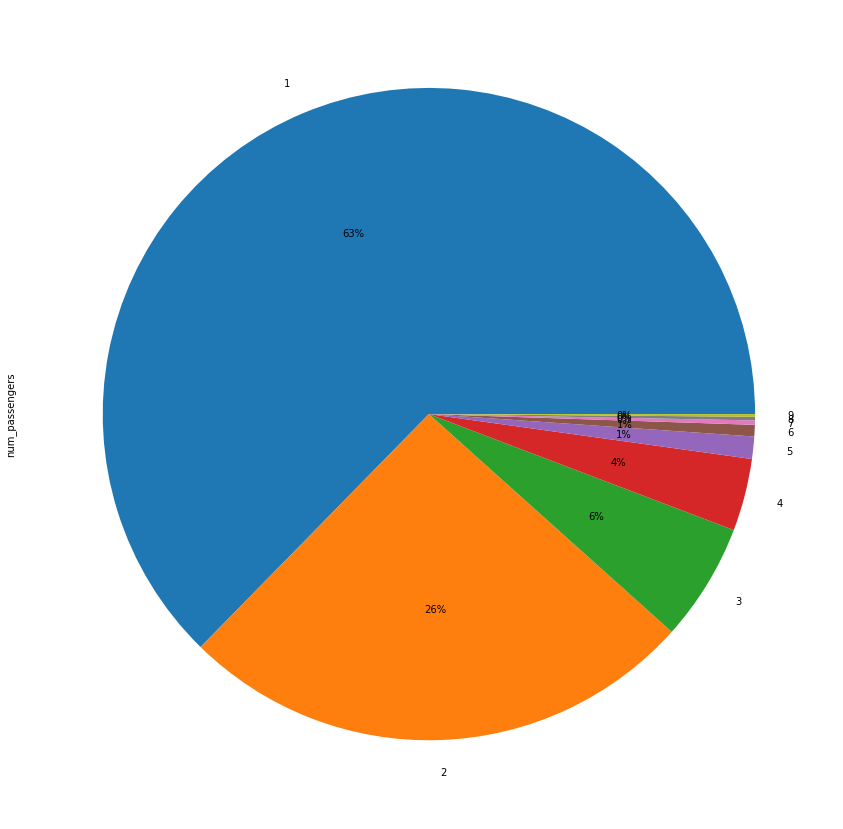

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
df.num_passengers.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

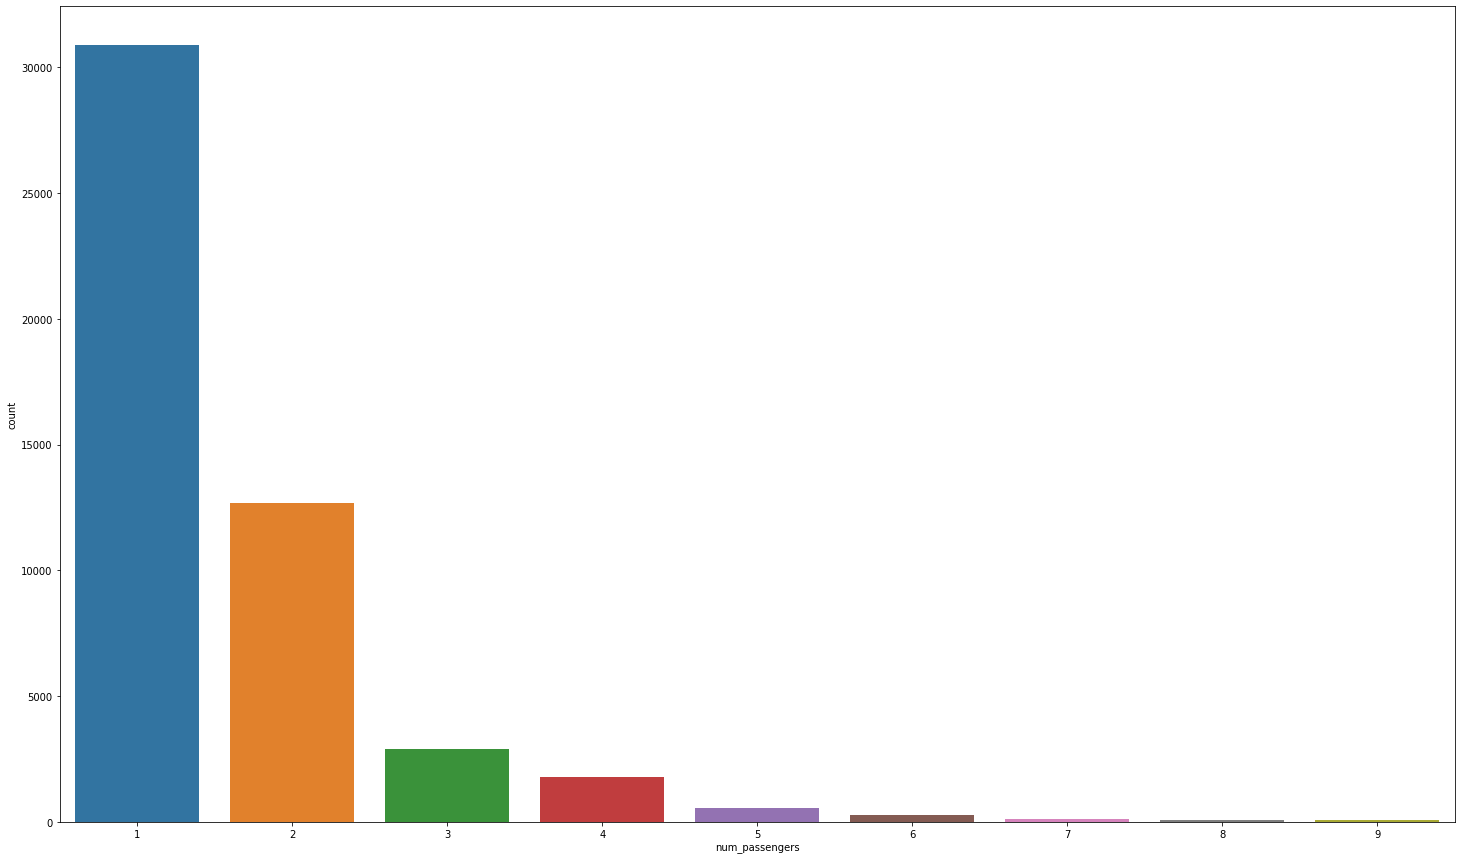

In [18]:
import seaborn as sns

plt.figure(figsize=(25,15))
sns.countplot(x=df.num_passengers)

plt.show()

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [20]:
df.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

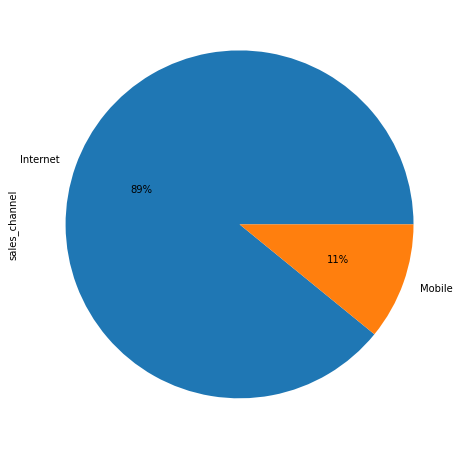

In [21]:
plt.figure(figsize=(15,8))
df.sales_channel.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

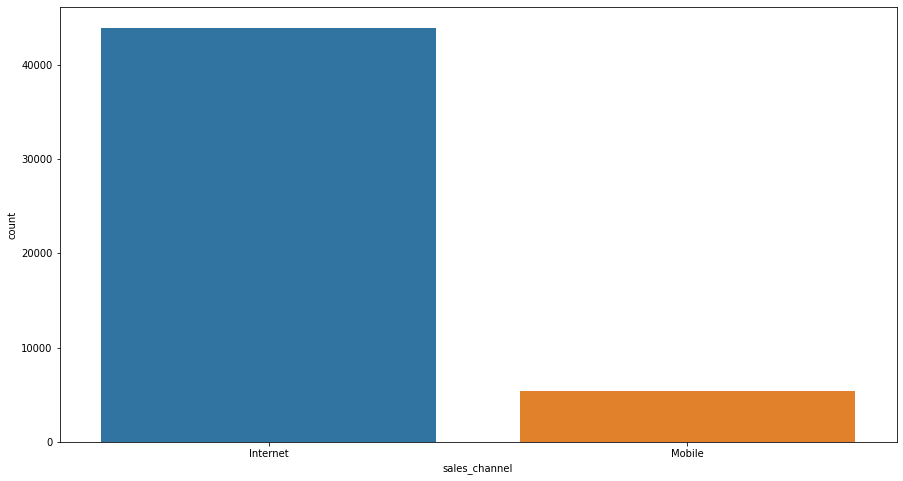

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.sales_channel)
plt.show()

In [23]:
df.trip_type.value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

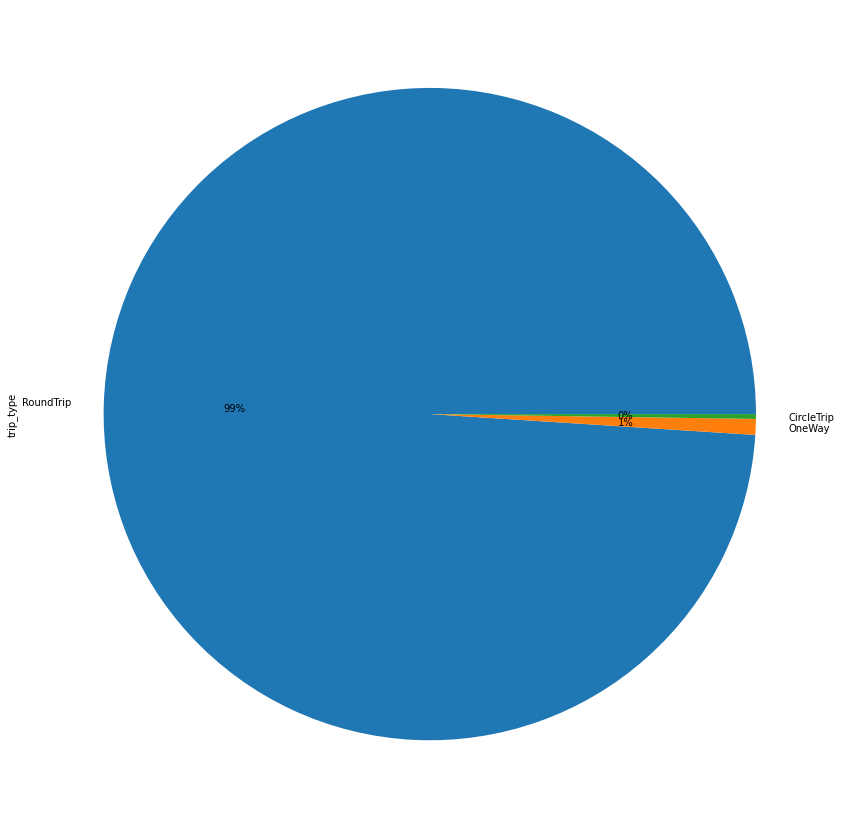

In [24]:
plt.figure(figsize=(25, 15))
df.trip_type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

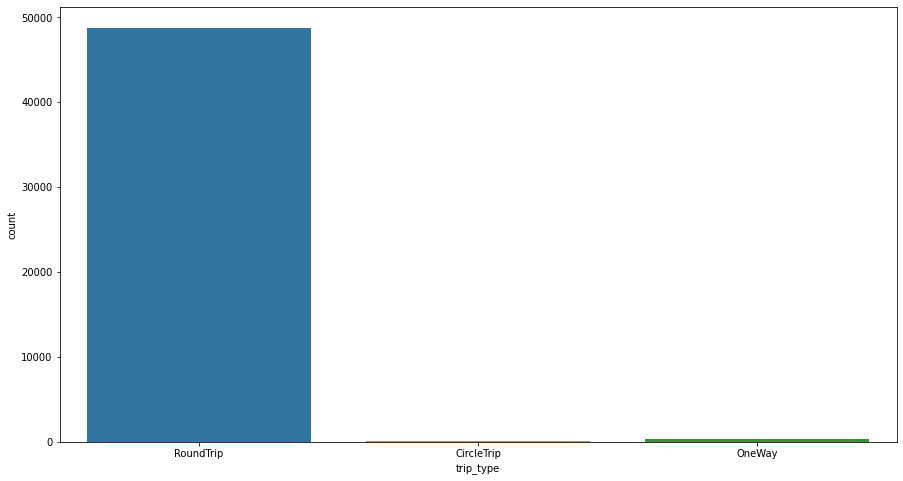

In [25]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.trip_type)
plt.show()

In [26]:
import warnings
warnings.filterwarnings("ignore") 

In [27]:
df.purchase_lead

0        262
1        112
2        243
3         96
4         68
        ... 
49995     27
49996    111
49997     24
49998     15
49999     19
Name: purchase_lead, Length: 49281, dtype: int64

In [28]:
import scipy.stats as stats

def visua(n):
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(x=n)

  plt.subplot(122)
  stats.probplot(n, dist="norm", plot=plt)

  plt.show()

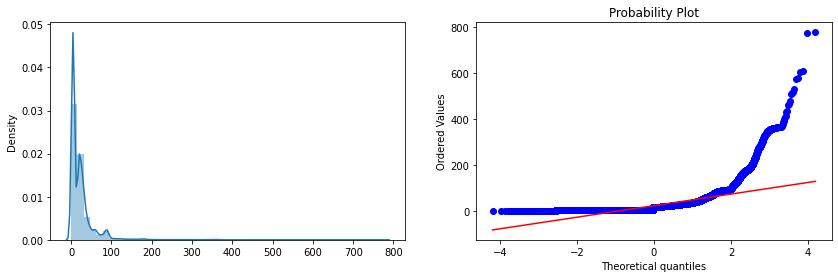

In [29]:
visua(df.length_of_stay)

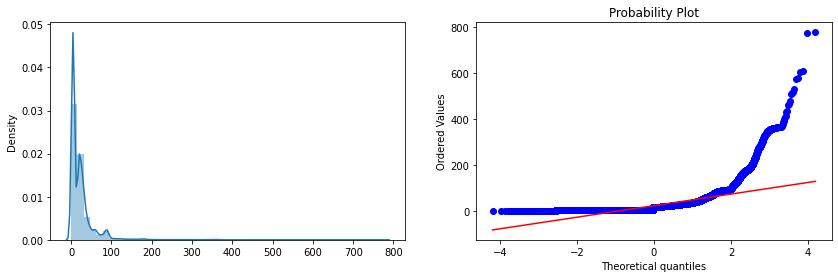

In [30]:
visua(df.length_of_stay)

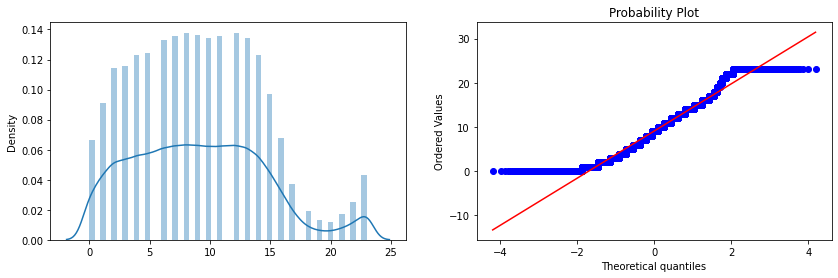

In [31]:
visua(df.flight_hour)

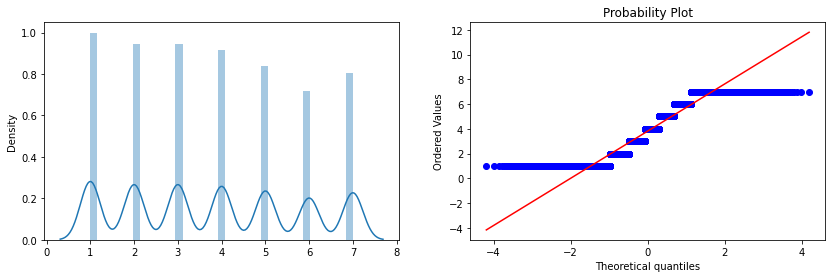

In [32]:
visua(df.flight_day)

In [33]:
df.route.value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [34]:
df.booking_origin.value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [35]:
df.wants_extra_baggage.value_counts()

1    32931
0    16350
Name: wants_extra_baggage, dtype: int64

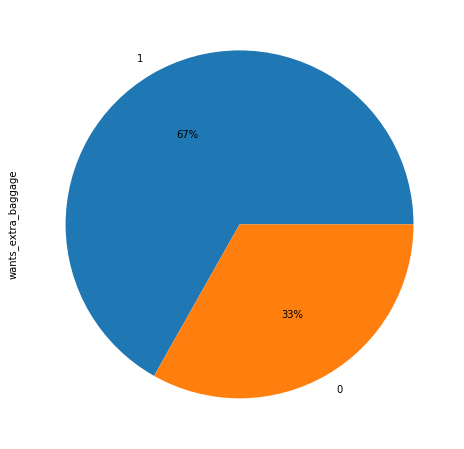

In [36]:
plt.figure(figsize=(18, 8))
df.wants_extra_baggage.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

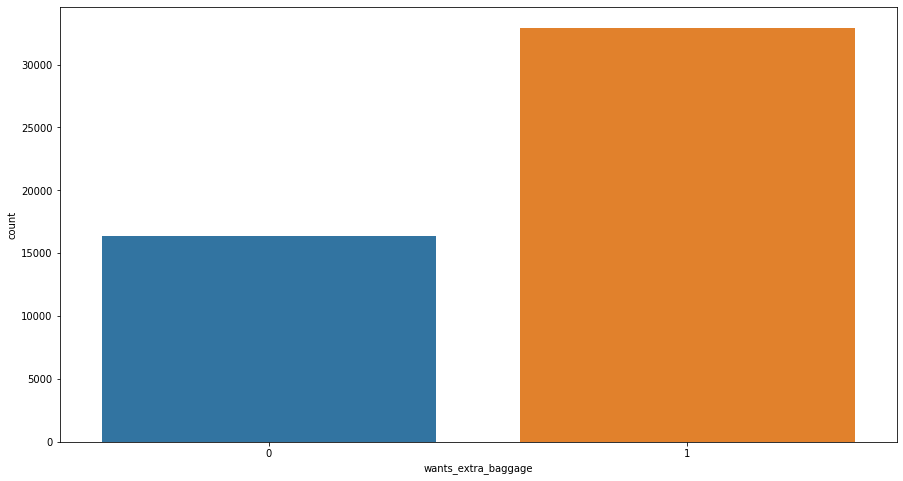

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_extra_baggage)
plt.show()

In [38]:
df.wants_preferred_seat.value_counts()

0    34712
1    14569
Name: wants_preferred_seat, dtype: int64

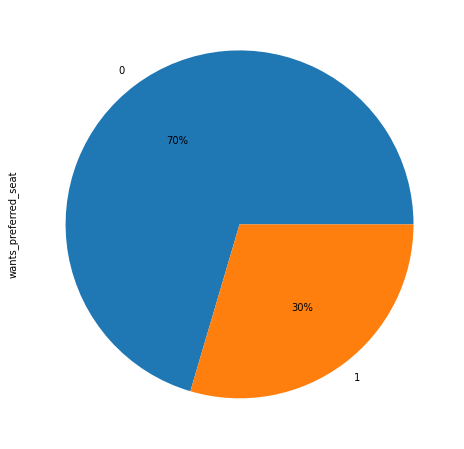

In [39]:
plt.figure(figsize=(15, 8))
df.wants_preferred_seat.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

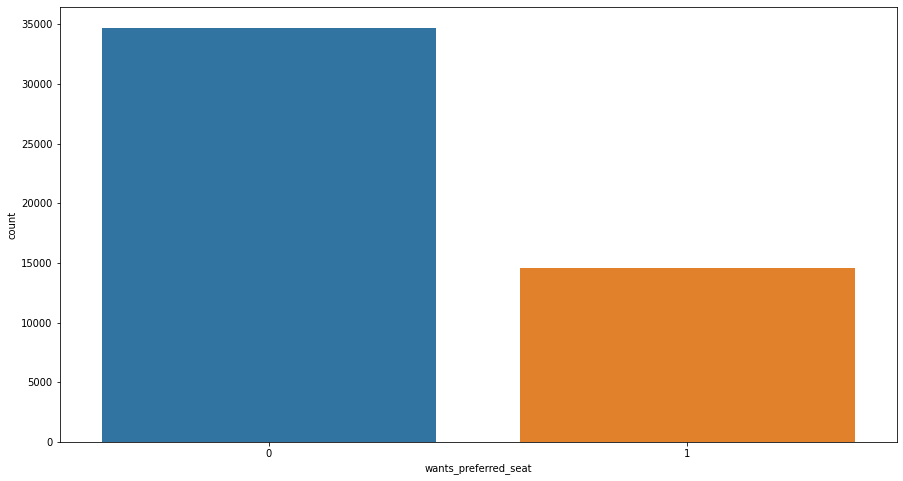

In [40]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_preferred_seat)
plt.show()

In [41]:
df.wants_in_flight_meals.value_counts()

0    28256
1    21025
Name: wants_in_flight_meals, dtype: int64

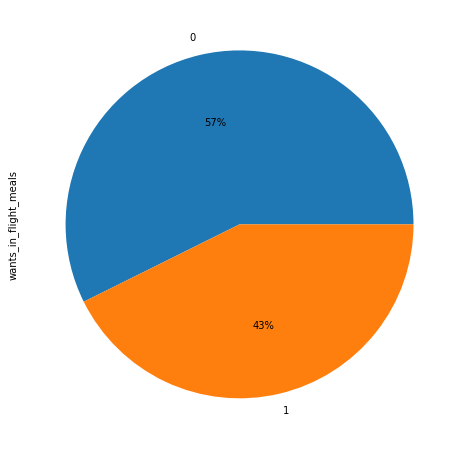

In [42]:
plt.figure(figsize=(15, 8))
df.wants_in_flight_meals.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

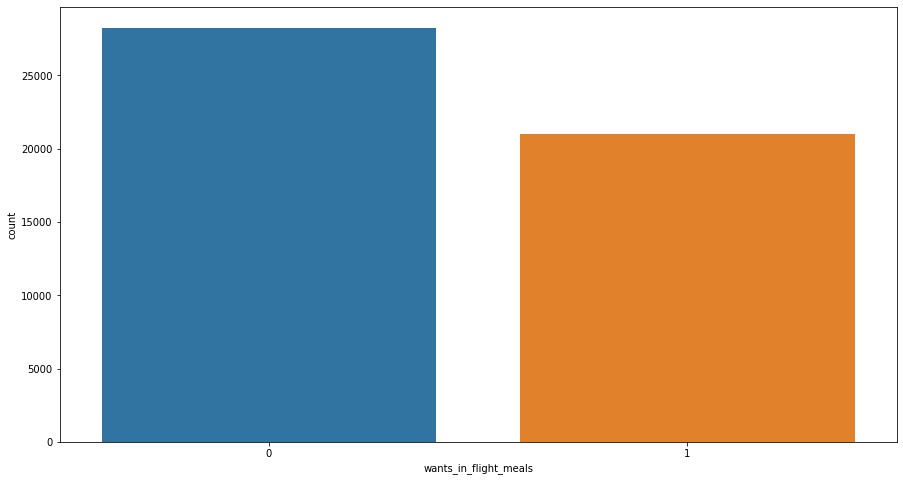

In [43]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_in_flight_meals)
plt.show()

In [44]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [45]:
df.flight_duration.value_counts()

8.83    14339
8.58     6892
5.62     5464
6.62     4658
7.00     3314
7.57     2785
4.67     2699
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: flight_duration, dtype: int64

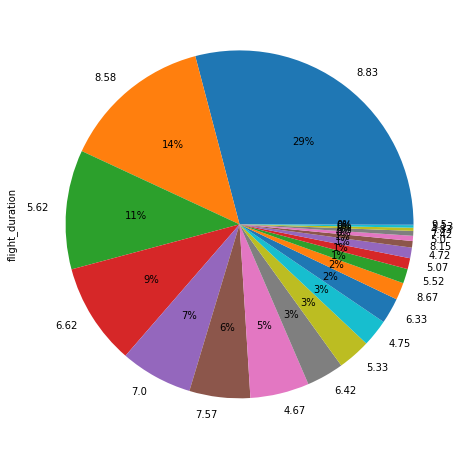

In [46]:
plt.figure(figsize=(15, 8))
df.flight_duration.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

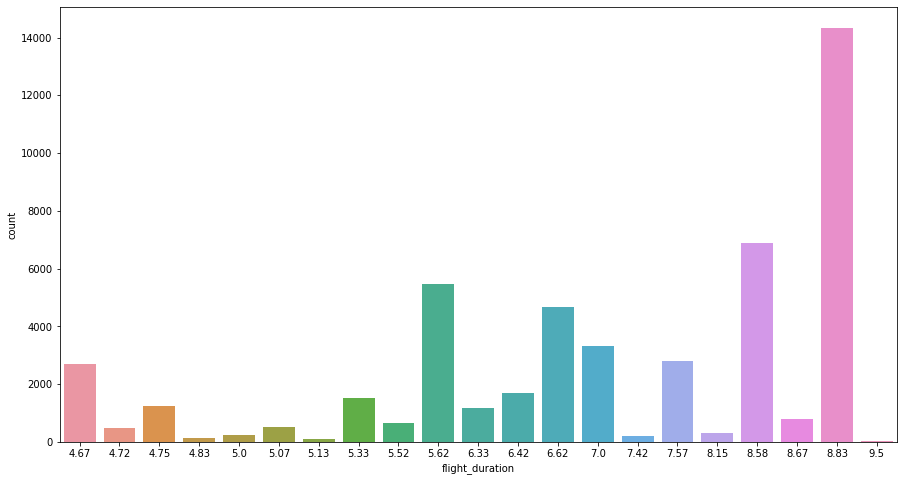

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.flight_duration)
plt.show()

In [48]:
df.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

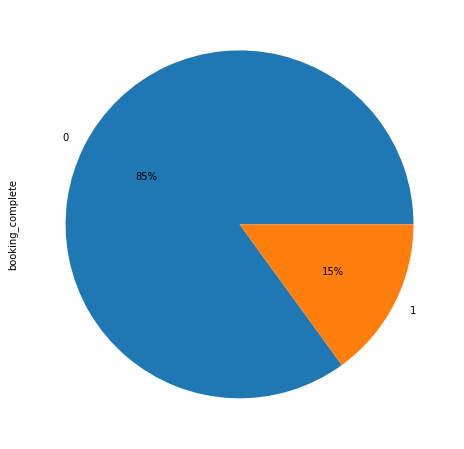

In [49]:
plt.figure(figsize=(15, 8))
df.booking_complete.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

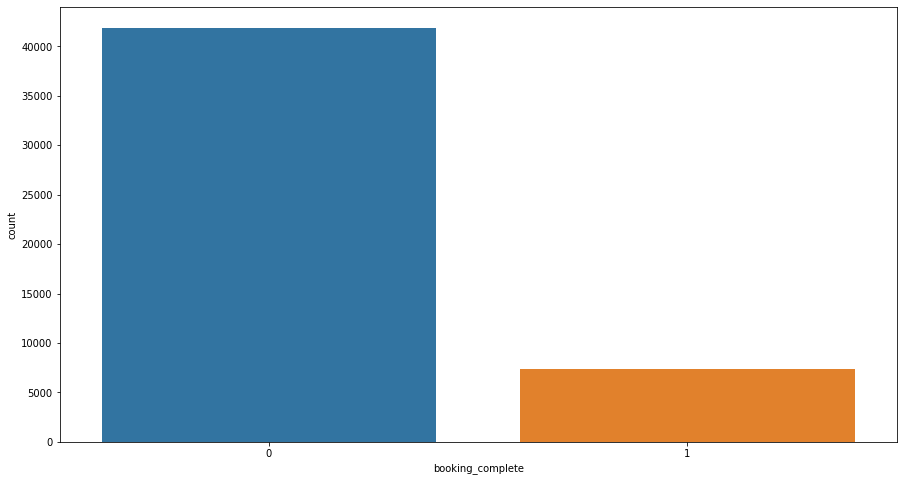

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.booking_complete)
plt.show()

In [51]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [52]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [53]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052951
booking_origin           0.048989
flight_duration          0.016163
length_of_stay           0.008400
wants_extra_baggage      0.008089
num_passengers           0.002979
wants_in_flight_meals    0.002464
flight_hour              0.002201
trip_type                0.001977
wants_preferred_seat     0.001895
sales_channel            0.001237
flight_day               0.001207
purchase_lead            0.000000
Name: MI Scores, dtype: float64

In [55]:
import numpy as np

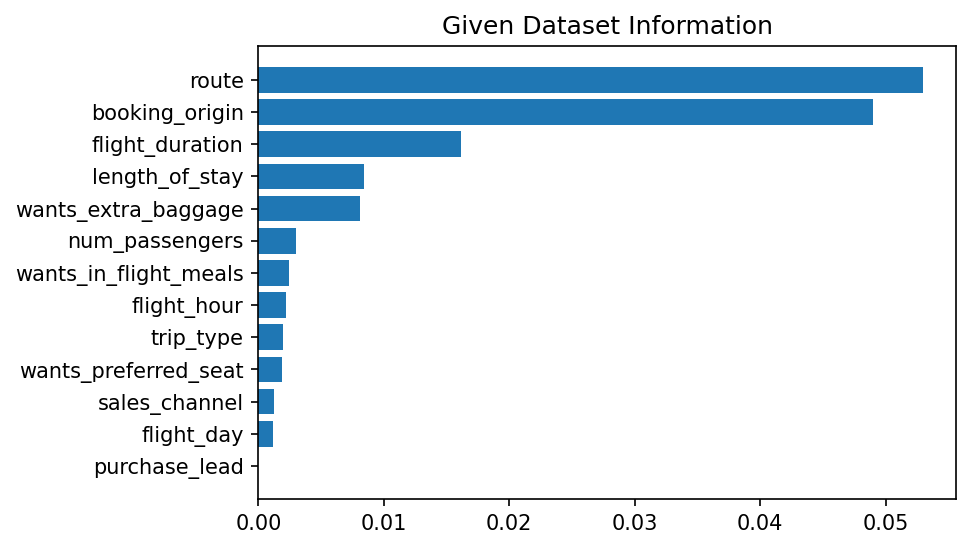

In [76]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Given Dataset Information")


plt.figure(dpi=150, figsize=(6,4))
plot_mi_scores(mi_scores)

In [57]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [58]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X


Model 1 : Random forest classifier with top 6 features

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.18961144364411
AUC score:  0.5550789000771094



**Model 2 : Random forest classifier with all features**

In [60]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.8229684488181
AUC score:  0.5466087566018926



**Model 3 : XGB classifier with top 6 features**

In [61]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.92441919448109
AUC score:  0.5191124184946556



**Model 4 : XGB classifier with all features**

In [62]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.85340367251699
AUC score:  0.5323239871720831


In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
cf_matrix = confusion_matrix(y_val,prediction_xgb)

In [69]:
cf_matrix

array([[8245,  132],
       [1361,  119]])

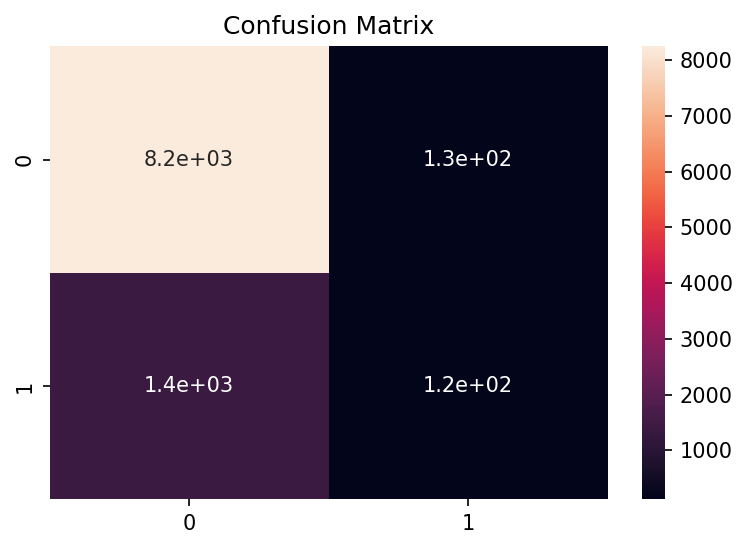

In [77]:
plt.figure(dpi=150, figsize=(6,4))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()